## SQRB Example

In [ ]:
from sqrb import SQRB_Experiment
from selene_sim import DepolarizingErrorModel, Stim
from pecos_selene import qsystem_model_alpha # requires pecos_selene

In [2]:
# select parameters and build experiment

n_qubits = 10
seq_lengths = [10, 500, 1000]
seq_reps = 10
filename = 'exp_SQRB_example.p'

exp = SQRB_Experiment(n_qubits, seq_lengths, seq_reps, filename=filename)
#exp.options['measure_leaked'] = True # False by default.
exp.add_settings()

In [ ]:
# or load an existing experiment from working directory

filename = 'exp_SQRB_example.p'
exp = SQRB_Experiment.load(filename)

Having setup our SQRB experiment, we can now either simulate using a local simulator or submit to a hardware or emulator backend.

### Run local simulation using Selene

In [4]:
# Setup simple error model

error_model = DepolarizingErrorModel(
    random_seed=1234,
    # single qubit gate error rate
    p_1q=1e-4,
    # two qubit gate error rate
    #p_2q=1e-3,
    # set state preparation and measurement error rates to 0
    p_meas=0,
    p_init=0,
)

In [4]:
# Or use hardware realistic error model

error_model = qsystem_model_alpha(random_seed=123)

C:\Users\karl.mayer\AppData\Local\anaconda3\envs\guppy_env\Lib\site-packages\pecos_selene\error_models\named.py:30: UserWarning: 


* There is no crosstalk noise on measurements and reset.

* The noise parameter values are rough estimates, using a combination of target values for Helios and values from H2's model. These have not been verified by tomography experiments on the device.

* Anduril (the component that decides ion transport) does not currently report accurate timing estimates. This affects the memory error.

  warnings.warn(msg)


In [5]:
# simulate experiment

shots = 100
simulator = Stim()

exp.sim(shots, error_model=error_model, simulator=simulator)

Simulating ...
1/30 circuits complete
2/30 circuits complete
3/30 circuits complete
4/30 circuits complete
5/30 circuits complete
6/30 circuits complete
7/30 circuits complete
8/30 circuits complete
9/30 circuits complete
10/30 circuits complete
11/30 circuits complete
12/30 circuits complete
13/30 circuits complete
14/30 circuits complete
15/30 circuits complete
16/30 circuits complete
17/30 circuits complete
18/30 circuits complete
19/30 circuits complete
20/30 circuits complete
21/30 circuits complete
22/30 circuits complete
23/30 circuits complete
24/30 circuits complete
25/30 circuits complete
26/30 circuits complete
27/30 circuits complete
28/30 circuits complete
29/30 circuits complete
30/30 circuits complete


### Submit to Quantinuum Hardware or Emulator backend using Nexus

In [ ]:
# Choose domain and login to Nexus

import qnexus

### uncomment lines below if submitting to QA ###
#from qnexus.config import CONFIG
#CONFIG.domain = "qa.myqos.com"

qnexus.login_with_credentials()

In [ ]:
# choose nexus project and setup quantinuum backend config

project = qnexus.projects.get_or_create(name='SQRB-example-project')
qnexus.context.set_active_project(project)

backend_config = qnexus.QuantinuumConfig(device_name='Helios-1E', simulator='stabilizer', max_cost=1000000)

In [ ]:
# submit experiment. Returns a qnexus ExecuteJobRef

shots = 100

execute_job_ref = exp.submit(shots, backend_config)

In [ ]:
# inspect status of the execution job

qnexus.jobs.status(execute_job_ref)

In [ ]:
# retrieve results

exp.retrieve(execute_job_ref)

### Analyze experiment results

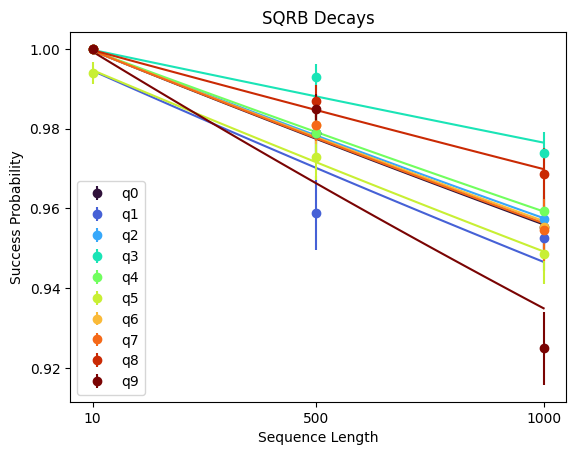

Average Infidelities
------------------------------
qubit 0: 4.6e-05 +/- 7e-06
qubit 1: 5.1e-05 +/- 9e-06
qubit 2: 4.4e-05 +/- 7e-06
qubit 3: 2.4e-05 +/- 5e-06
qubit 4: 4.3e-05 +/- 8e-06
qubit 5: 4.9e-05 +/- 9e-06
qubit 6: 4.5e-05 +/- 7e-06
qubit 7: 4.6e-05 +/- 7e-06
qubit 8: 3.1e-05 +/- 6e-06
qubit 9: 7e-05 +/- 8e-06
------------------------------
Qubit Average: 4.5e-05 +/- 2e-06


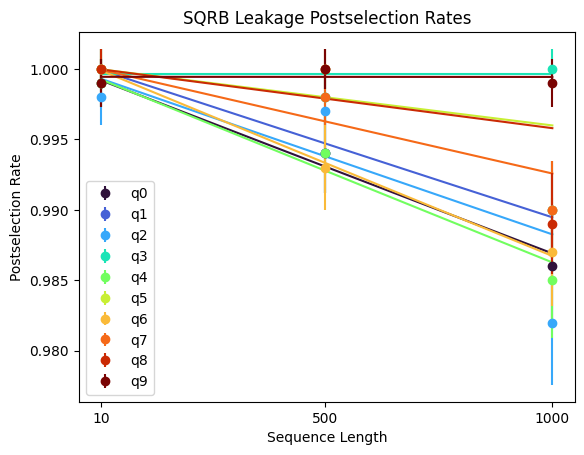

Qubit average leakge rate: 8e-06 +/- 1e-06


In [6]:
exp.analyze_results()

In [19]:
# save experiment object to working directory

exp.save()